# Nombre y Matricula
### Alejandro Moncada Espinosa - A01638343

# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [279]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [280]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [281]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [282]:
# Print dataset shape
dataset.shape

(150, 5)

In [283]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [284]:
# Drop na
dataset = dataset.dropna()
dataset.shape

(150, 5)

3. Encoding the class label categorical column: from string to num


In [285]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_11896\252957063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [286]:
# Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset

5. Scatter plot of the data

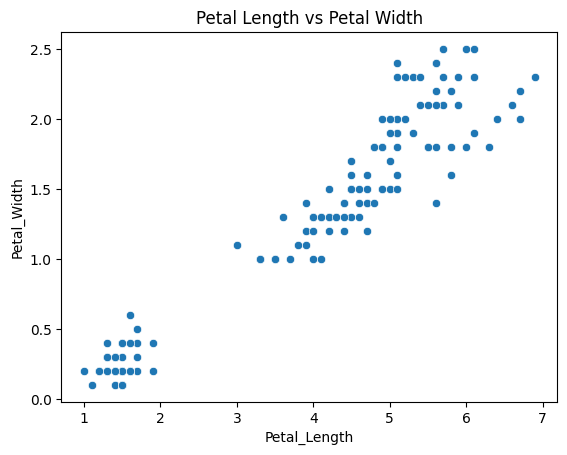

In [287]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(data=dataset, x="Petal_Length", y="Petal_Width").set_title("Petal Length vs Petal Width")
plt.show()

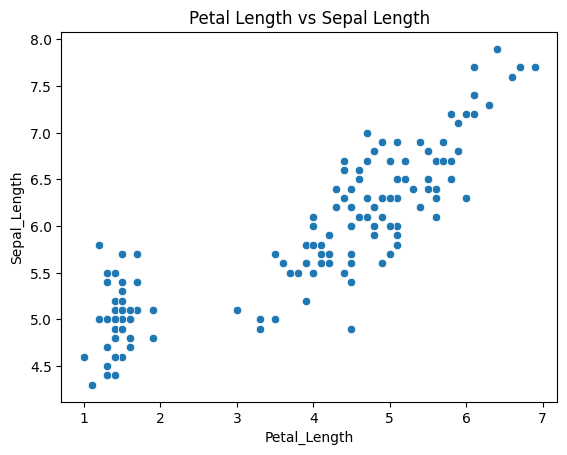

In [288]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(data=dataset, x="Petal_Length", y="Sepal_Length").set_title("Petal Length vs Sepal Length")
plt.show()


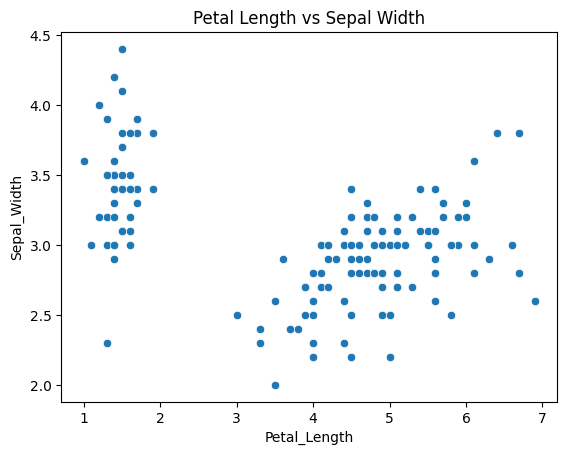

In [289]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(data=dataset, x="Petal_Length", y="Sepal_Width").set_title("Petal Length vs Sepal Width")
plt.show()

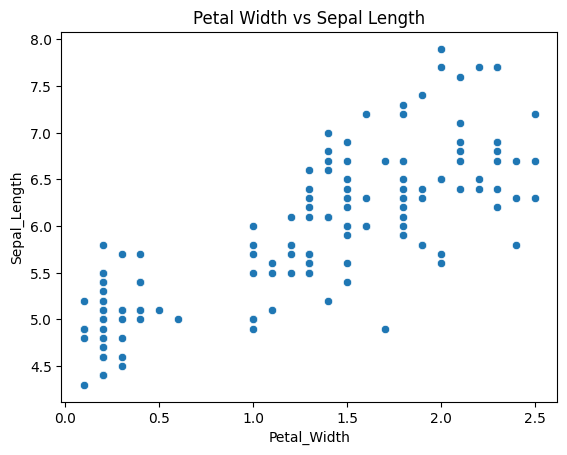

In [290]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(data=dataset, x="Petal_Width", y="Sepal_Length").set_title("Petal Width vs Sepal Length")
plt.show()

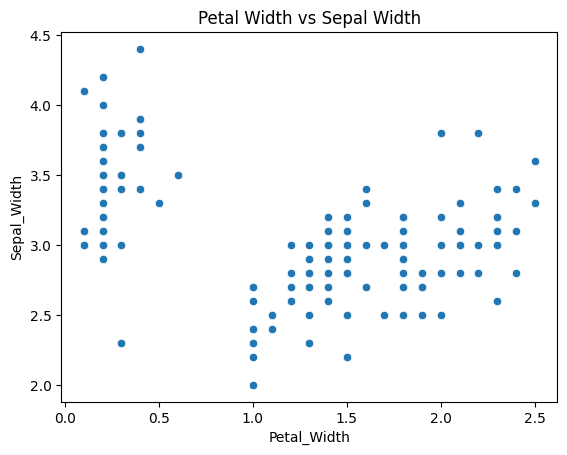

In [291]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(data=dataset, x="Petal_Width", y="Sepal_Width").set_title("Petal Width vs Sepal Width")
plt.show()

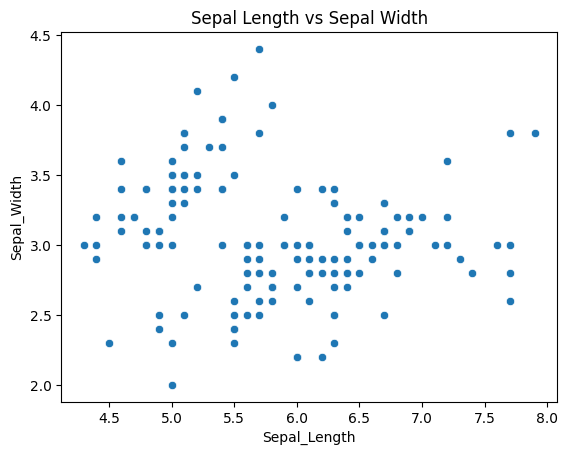

In [292]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(data=dataset, x="Sepal_Length", y="Sepal_Width").set_title("Sepal Length vs Sepal Width")
plt.show()

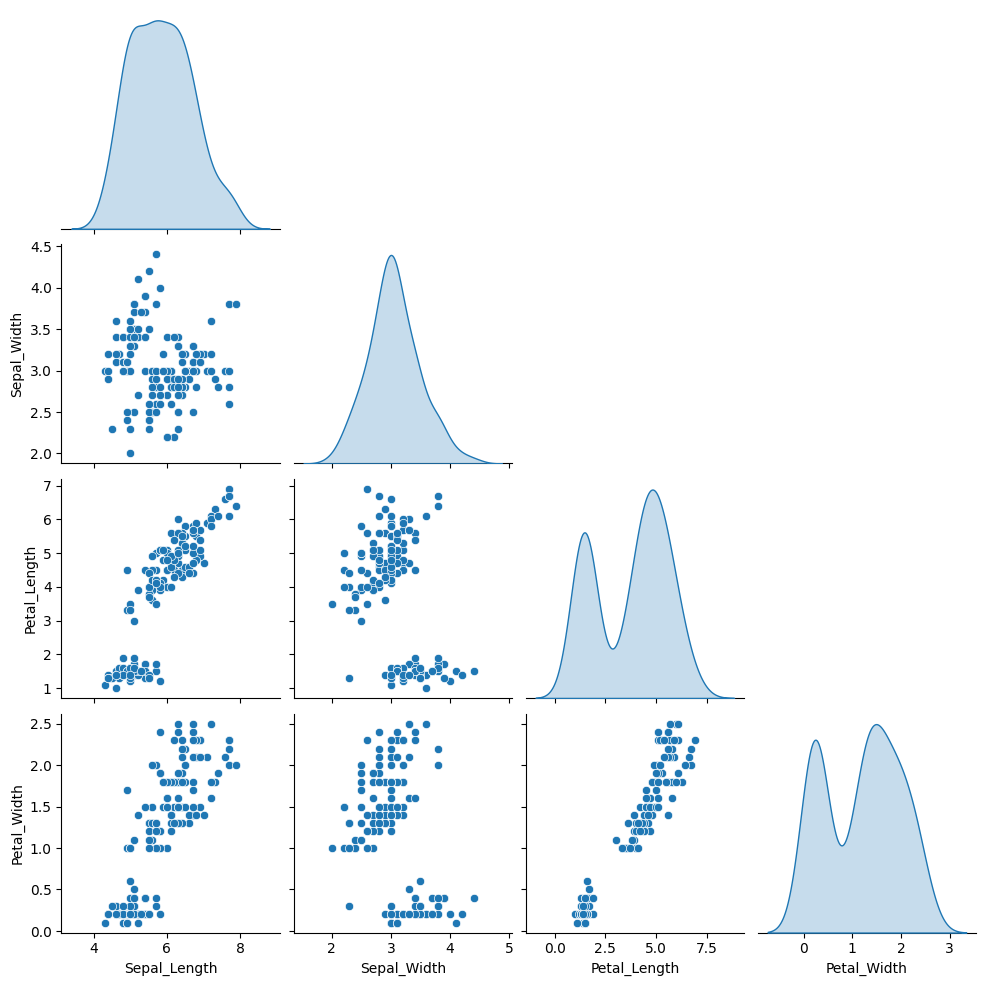

In [293]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
plt.show()

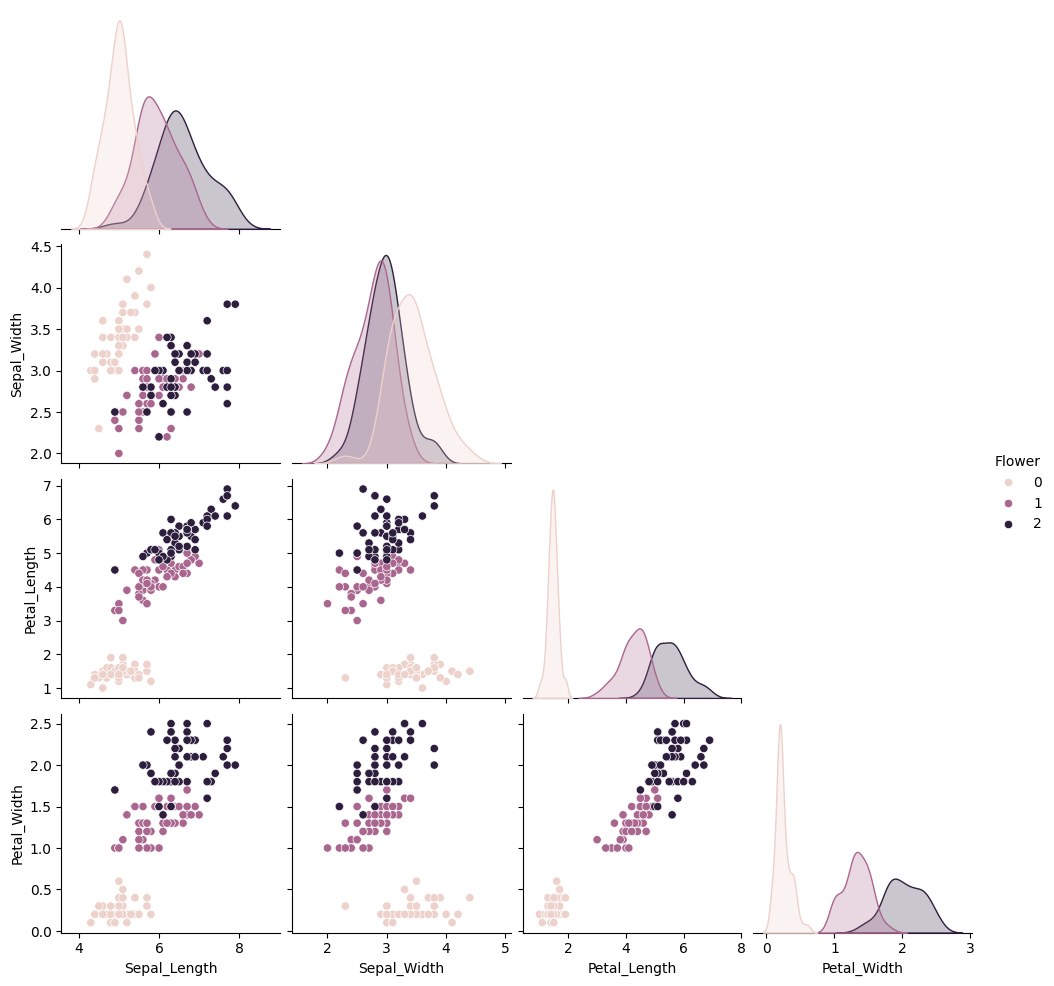

In [294]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [295]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

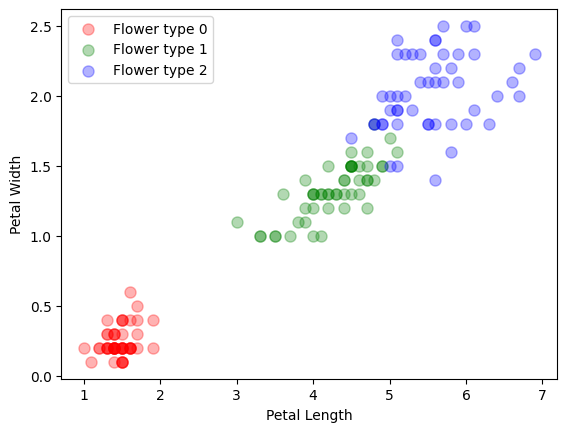

In [296]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

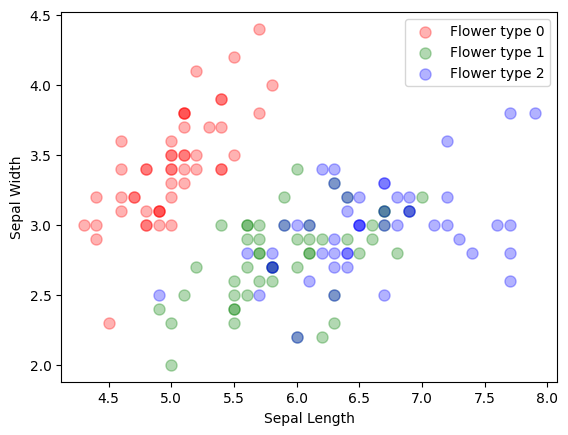

In [297]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [298]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [299]:
# Understand the data X
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(150, 4)


In [300]:
# Understand the data y
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(150,)


In [301]:
# Calculate the number of observations in the dataset
y.shape[0]

150

In [302]:
# Calculate the number of observations for class 0
sum(y==0)

np.int64(50)

In [303]:
# Calculate the number of observations for class 1
sum(y==1)

np.int64(50)

In [304]:
# Calculate the number of observations for class 2
sum(y==2)

np.int64(50)

# Train a classifier

## Train the classification model

In [305]:
# Import sklearn linear_model
from sklearn import linear_model

# Initialize the classifier
logreg = linear_model.LogisticRegression(C=1e5)

# Fit the model to the training data
logreg.fit(X, y)



LogisticRegression(C=100000.0)

## Predict the class of a new observation

In [306]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [307]:
# Make the prediction using xnew
pred = logreg.predict(xnew)

# Get the predicted class
pred


array([0])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [308]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [309]:
# Number of observations in the train set
print(X_train.shape[0])
print(y_train.shape[0])


120
120


In [310]:
# Number of observations of each class in the train set
print(sum(y_train==0))
print(sum(y_train==1))
print(sum(y_train==2))


44
37
39


In [311]:
# Number of observations in the test set
print(X_test.shape[0])
print(y_test.shape[0])


30
30


In [312]:
# Number of observations of each class in the test set
print(sum(y_test==0))
print(sum(y_test==1))
print(sum(y_test==2))


6
13
11


## Train the classification model

In [313]:
# Initialize the classifier
logreg = linear_model.LogisticRegression(C=1e5)

# Fit the model to the training data
logreg.fit(X_train, y_train)


LogisticRegression(C=100000.0)

## Test the classification model

In [314]:
# Make the predictions using the test set
y_pred  = logreg.predict(X_test)


In [315]:
# Explore real and predicted labels
print(y_test)
print(y_pred)


[2 0 2 2 1 0 2 1 1 2 1 2 0 0 1 2 0 1 2 2 1 0 1 2 1 1 1 2 1 1]
[2 0 2 2 1 0 2 1 1 2 1 2 0 0 1 2 0 1 1 2 1 0 1 2 1 2 2 2 1 1]


## Compute the acurracy

In [316]:
# Define a function to compute accuracy
def compute_accuracy(actual, predicted):
    acc = np.sum(np.equal(actual, predicted)) / len(actual)
    return acc

In [317]:
# Calculate total accuracy
acctotal = 100 * compute_accuracy(y_test, y_pred)
print(f"The accuracy of the model is: {acctotal}%")

The accuracy of the model is: 90.0%


In [318]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score

acctotal = 100 * accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {acctotal}%")

The accuracy of the model is: 90.0%


In [319]:
# Compute accuracy for class 0
classlabel = 0
idx = y_test == classlabel
acc = 100 * accuracy_score(y_test[idx], y_pred[idx])
print(f"The accuracy of the model for class 0 is: {acc}%")

The accuracy of the model for class 0 is: 100.0%


In [320]:
# Compute accuracy for class 1
classlabel = 1
idx = y_test == classlabel
acc = 100 * accuracy_score(y_test[idx], y_pred[idx])
print(f"The accuracy of the model for class 1 is: {acc}%")

The accuracy of the model for class 1 is: 84.61538461538461%


In [321]:
# Compute accuracy for class 2
classlabel = 2
idx = y_test == classlabel
acc = 100 * accuracy_score(y_test[idx], y_pred[idx])
print(f"The accuracy of the model for class 2 is: {acc}%")

The accuracy of the model for class 2 is: 90.9090909090909%


## Confussion matrix

In [322]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

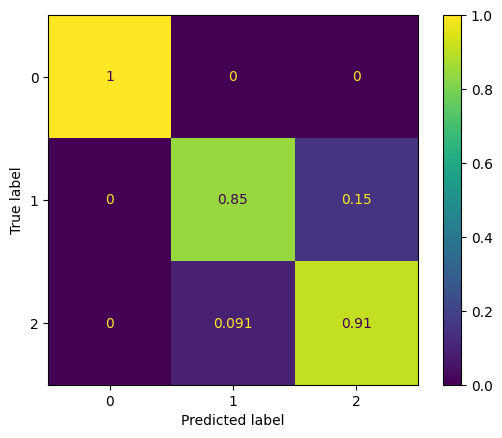

In [323]:
# Plot normalized confussion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?